https://www.kaggle.com/datasets/mexwell/google-merchandise-sales-data/code

# Google Merchandise Store Data Analysis

**Client Company:** Google Merchandise Store

**Data:** The client has provided three datasets: events, items, and users, containing information about user interactions, product details, and customer demographics.

**Business Need:** The Google Merchandise Store aims to gain deeper insights into customer behavior, product performance, and sales trends to optimize their marketing strategies, product offerings, and overall business performance. They have engaged us as data science consultants to conduct an explanatory data analysis and provide actionable recommendations based on the data.

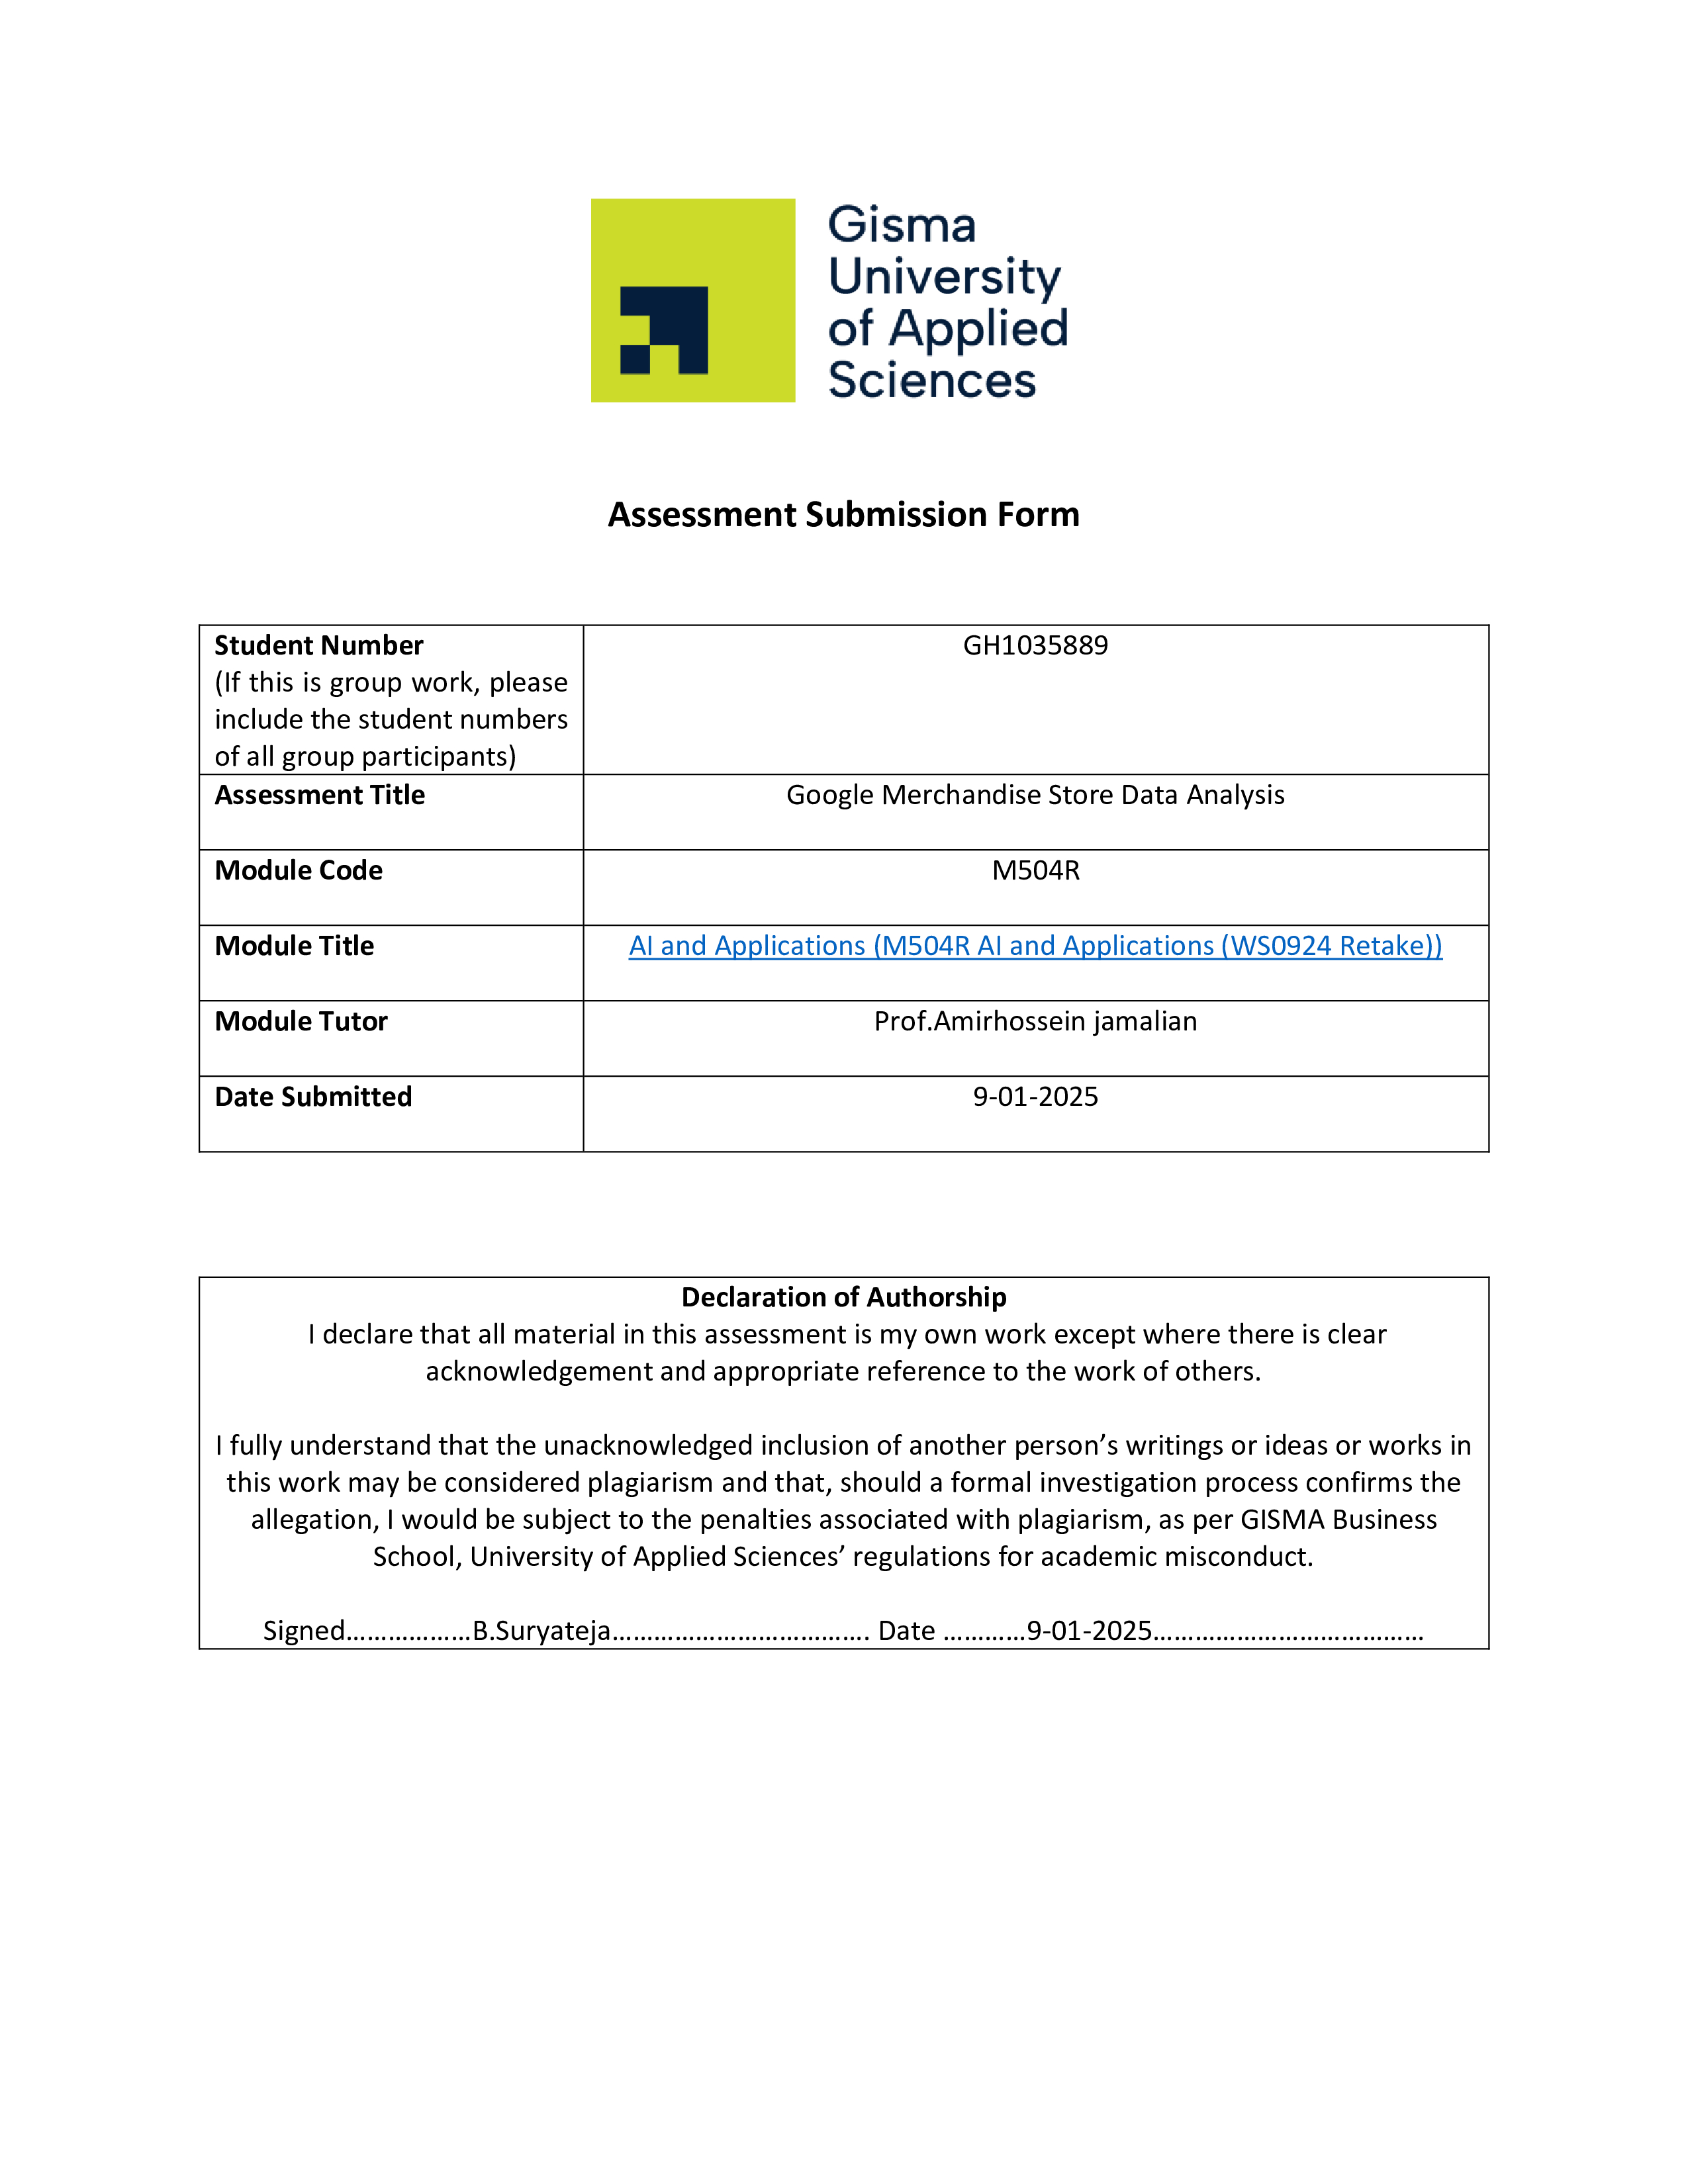

## **IMPORTING LIBRARIES**

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **LOADING THE DATA**

In [177]:
event = pd.read_csv('/content/events1.csv')

In [178]:
itm = pd.read_csv('/content/items.csv')

In [179]:
usr = pd.read_csv('/content/users.csv')

## **Merging the data**


Here we have 3 data sets event and item have a common column of item id based on which we can merge the data of these datas sets and match the resulting dataset with user id to merge the whole data.here outer join  is used for item id to ensure all items are included and inner join is used in case of usr and resultant data to ensure all valid users are included for data analysis


In [180]:
print(event.head())
print(itm.head())
print(usr.head())

   user_id  ga_session_id country   device         type  item_id  \
0     2133          16909      US   mobile     purchase       94   
1     2133          16909      US   mobile     purchase      425   
2     5789          16908      SE  desktop     purchase        1   
3     5789          16908      SE  desktop     purchase       62   
4     5808           4267      US   mobile  add_to_cart      842   

                  date  
0  2020-11-01 00:27:14  
1  2020-11-01 00:27:14  
2  2020-11-01 01:44:44  
3  2020-11-01 01:44:44  
4  2020-11-01 03:06:29  
   id                                    name   brand             variant  \
0   0            Google Land & Sea Cotton Cap  Google  Single Option Only   
1   1                          Google KeepCup  Google  Single Option Only   
2   2  Google Land & Sea Nalgene Water Bottle  Google  Single Option Only   
3   3             Google Unisex Eco Tee Black  Google                  LG   
4   4            Google Chicago Campus Bottle  Google  S

Here we data is merged using outer join in case of event and itm dataset
and the resulting data is merged with usr dataset using userid as the common column to

In [181]:
googlesales = (event.merge(itm, left_on='item_id', right_on='id', how='outer')
    .merge(usr, left_on='user_id', right_on='id', how='inner'))

In [182]:
print(googlesales.head())

   user_id  ga_session_id country   device      type  item_id  \
0     5115          17001      US   mobile  purchase        0   
1    10904          16401      TR  desktop  purchase        0   
2    29457          17113      KR   mobile  purchase        0   
3    30148          16175      MT  desktop  purchase        0   
4    32087          15869      US  desktop  purchase        0   

                date_x  id_x                          name   brand  \
0  2020-11-02 12:05:14     0  Google Land & Sea Cotton Cap  Google   
1  2020-11-03 08:19:14     0  Google Land & Sea Cotton Cap  Google   
2  2020-11-05 18:02:19     0  Google Land & Sea Cotton Cap  Google   
3  2020-11-05 18:33:59     0  Google Land & Sea Cotton Cap  Google   
4  2020-11-06 03:39:46     0  Google Land & Sea Cotton Cap  Google   

              variant category  price_in_usd   id_y  ltv               date_y  
0  Single Option Only  Apparel            14   5115   85  2020-11-02 11:53:43  
1  Single Option Only  Appar


Understanding the **columns**


user_id:this is unique id for a user

ga_session_id: session id of the user

type : type of action or event, such as a purchase, click, add to cart, or a visit.

item_id: This is a  unique id for an item or product

variant: Specifies a variation of the product, such as size, color, or edition.

category: The product's category, used for classification (e.g., electronics, clothing, groceries).



ltv: Represents the lifetime value of the user, estimating their total contribution or value over time




## **DATA EXPLORATION**

In [183]:
print(googlesales.columns)

Index(['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id',
       'date_x', 'id_x', 'name', 'brand', 'variant', 'category',
       'price_in_usd', 'id_y', 'ltv', 'date_y'],
      dtype='object')


In [184]:
print(googlesales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758884 entries, 0 to 758883
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        758884 non-null  int64 
 1   ga_session_id  758884 non-null  int64 
 2   country        754329 non-null  object
 3   device         758884 non-null  object
 4   type           758884 non-null  object
 5   item_id        758884 non-null  int64 
 6   date_x         758884 non-null  object
 7   id_x           758884 non-null  int64 
 8   name           758884 non-null  object
 9   brand          758884 non-null  object
 10  variant        122624 non-null  object
 11  category       758884 non-null  object
 12  price_in_usd   758884 non-null  int64 
 13  id_y           758884 non-null  int64 
 14  ltv            758884 non-null  int64 
 15  date_y         758884 non-null  object
dtypes: int64(7), object(9)
memory usage: 92.6+ MB
None


In [185]:
print(googlesales.shape)

(758884, 16)


In [186]:
googlesales.isna().sum()

,0
user_id,0
ga_session_id,0
country,4555
device,0
type,0
item_id,0
date_x,0
id_x,0
name,0
brand,0


Observations in the data set: country has 4555 values missing and the variant has 636260 values which is significant as the number of rows in this data is 758884 its better to drop the variant column and fill values in the country column as its a good practice not to delete data even thou it seems negligible

In [187]:
vratio = googlesales['variant'].isnull().sum() / len(googlesales)
print(f"{vratio}")

0.8384153572878068


In [188]:
cratio = googlesales['country'].isnull().sum() / len(googlesales)
print(f"{cratio}")

0.006002234860663817


## **DATA CLEANING**

Removing variant column as the data missing is 83 percent which is significant and hence dropped

In [189]:
googlesales = googlesales.drop('variant', axis=1)

In [190]:
googlesales['country'] = googlesales['country'].fillna('unknown')

In [191]:
googlesales.head()

,user_id,ga_session_id,country,device,type,item_id,date_x,id_x,name,brand,category,price_in_usd,id_y,ltv,date_y
0,5115,17001,US,mobile,purchase,0,2020-11-02 12:05:14,0,Google Land & Sea Cotton Cap,Google,Apparel,14,5115,85,2020-11-02 11:53:43
1,10904,16401,TR,desktop,purchase,0,2020-11-03 08:19:14,0,Google Land & Sea Cotton Cap,Google,Apparel,14,10904,40,2020-09-06 09:19:37
2,29457,17113,KR,mobile,purchase,0,2020-11-05 18:02:19,0,Google Land & Sea Cotton Cap,Google,Apparel,14,29457,33,2020-11-05 17:51:34
3,30148,16175,MT,desktop,purchase,0,2020-11-05 18:33:59,0,Google Land & Sea Cotton Cap,Google,Apparel,14,30148,517,2020-09-27 21:00:27
4,32087,15869,US,desktop,purchase,0,2020-11-06 03:39:46,0,Google Land & Sea Cotton Cap,Google,Apparel,14,32087,55,2020-11-06 03:15:36


Checking the null values after the changes in our data

In [192]:
googlesales.isna().sum()

,0
user_id,0
ga_session_id,0
country,0
device,0
type,0
item_id,0
date_x,0
id_x,0
name,0
brand,0


Duplicated data if anyto be checked in the data

In [193]:

duplicate_rows = googlesales[googlesales.duplicated()]


print(f"Number of duplicated rows: {len(duplicate_rows)}")


if not duplicate_rows.empty:
    print("\nDuplicated Rows:")
    print(duplicate_rows)

Number of duplicated rows: 39498

Duplicated Rows:
        user_id  ga_session_id country   device            type  item_id  \
28          956          16110      US   mobile        purchase        0   
69         8570            601      MY  desktop  begin_checkout        0   
73         7297            157      CA   mobile  begin_checkout        0   
75         7297            157      CA   mobile  begin_checkout        0   
77         7297            157      CA   mobile  begin_checkout        0   
...         ...            ...     ...      ...             ...      ...   
753828    12616           2333      CA  desktop     add_to_cart     1281   
753831    12616           2333      CA  desktop     add_to_cart     1281   
754171    30696            184      US  desktop     add_to_cart     1290   
754172    30696            184      US  desktop     add_to_cart     1290   
754587    23677           1672      CA   mobile     add_to_cart     1301   

                     date_x  id_x   

Deleting duplicated data there by increasing efficiency of our analysis

In [194]:

googlesales = googlesales.drop_duplicates(keep='first')


googlesales = googlesales.reset_index(drop=True)


print(f"Shape of DataFrame after removing duplicates: {googlesales.shape}")

Shape of DataFrame after removing duplicates: (719386, 15)


## **DATA PROCESSING**

mapping unknown country unknown_user_ids

In [195]:
unknown_user_ids = googlesales[googlesales['country'] == 'unknown']['user_id'].unique()


In [196]:
len(unknown_user_ids)

107

We have a set of user IDs whose country is marked as "unknown". We want to assign a more specific country to these users based on the country distribution seen in the rest of the dataset. If there's a clear dominant country in the googlesales DataFrame (excluding the rows with "unknown" countries), we'll assign that dominant country to the users with "unknown" countries.

In [197]:
import pandas as pd

user_country_mapping = {}

for user_id in unknown_user_ids:
    # Filter googlesales for the current user ID and known countries
    user_data = googlesales[(googlesales['user_id'] == user_id) & (googlesales['country'] != 'unknown')]

    # Calculate mode country if data is available
    if not user_data.empty:
        mode_country = user_data['country'].mode()
        if not mode_country.empty:
            user_country_mapping[user_id] = mode_country[0]

# Print the mode country for each of the user IDs
print("Mode Country for the User IDs:")
for user_id in unknown_user_ids:
    if user_id in user_country_mapping:
        print(f"User ID: {user_id}, Mode Country: {user_country_mapping[user_id]}")
    else:
        print(f"User ID: {user_id}, Mode Country: Not Found (No data with known countries)")

Mode Country for the User IDs:
User ID: 3008, Mode Country: Not Found (No data with known countries)
User ID: 18696, Mode Country: Not Found (No data with known countries)
User ID: 8363, Mode Country: Not Found (No data with known countries)
User ID: 25344, Mode Country: Not Found (No data with known countries)
User ID: 9216, Mode Country: Not Found (No data with known countries)
User ID: 11032, Mode Country: Not Found (No data with known countries)
User ID: 31485, Mode Country: Not Found (No data with known countries)
User ID: 741, Mode Country: Not Found (No data with known countries)
User ID: 7997, Mode Country: Not Found (No data with known countries)
User ID: 4182, Mode Country: Not Found (No data with known countries)
User ID: 23281, Mode Country: Not Found (No data with known countries)
User ID: 9662, Mode Country: Not Found (No data with known countries)
User ID: 15489, Mode Country: Not Found (No data with known countries)
User ID: 25390, Mode Country: Not Found (No data with 

In [198]:
googlesales.columns

Index(['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id',
       'date_x', 'id_x', 'name', 'brand', 'category', 'price_in_usd', 'id_y',
       'ltv', 'date_y'],
      dtype='object')

In [199]:
googlesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719386 entries, 0 to 719385
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        719386 non-null  int64 
 1   ga_session_id  719386 non-null  int64 
 2   country        719386 non-null  object
 3   device         719386 non-null  object
 4   type           719386 non-null  object
 5   item_id        719386 non-null  int64 
 6   date_x         719386 non-null  object
 7   id_x           719386 non-null  int64 
 8   name           719386 non-null  object
 9   brand          719386 non-null  object
 10  category       719386 non-null  object
 11  price_in_usd   719386 non-null  int64 
 12  id_y           719386 non-null  int64 
 13  ltv            719386 non-null  int64 
 14  date_y         719386 non-null  object
dtypes: int64(7), object(8)
memory usage: 82.3+ MB


Insight: Users with 'unknown' countries have no other associated country records within the dataset.

## **FEATURE ENGINEERING**

Creating heat map to understand the correlation of all the variables

In [200]:
for col in googlesales.columns:
    print(str(col) + ': ' + str(googlesales[col].dtype))

user_id: int64
ga_session_id: int64
country: object
device: object
type: object
item_id: int64
date_x: object
id_x: int64
name: object
brand: object
category: object
price_in_usd: int64
id_y: int64
ltv: int64
date_y: object


In [201]:
googlesales['country'].value_counts()

,count
country,
US,320548
IN,65029
CA,57270
GB,21776
ES,15297
...,...
TT,36
LB,31
HN,28


In [202]:
googlesales['name'].nunique()

421

In [203]:
for col in googlesales[['country', 'device', 'name', 'brand', 'category']]:
    print(str(col)+'--'+str(googlesales[col].nunique()))

country--109
device--3
name--421
brand--5
category--21


One hot encoding is done to these columns as the names of columns do not hold any value and can be represented using 'One hot encoding'
While 'type' is 'label encoded' as it carries value showing add_to_cart,begin checkout,purchase which holds weight to understand customer behaviour

In [204]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# One-hot encoding for specified columns
googlesales_corr = pd.get_dummies(googlesales,
                                   columns=['device', 'brand', 'category'],
                                   prefix=['device', 'brand', 'category'])

In [205]:
list(googlesales_corr.columns)

['user_id',
 'ga_session_id',
 'country',
 'type',
 'item_id',
 'date_x',
 'id_x',
 'name',
 'price_in_usd',
 'id_y',
 'ltv',
 'date_y',
 'device_desktop',
 'device_mobile',
 'device_tablet',
 'brand_#IamRemarkable',
 'brand_Android',
 'brand_Google',
 'brand_Google Cloud',
 'brand_YouTube',
 'category_Accessories',
 'category_Apparel',
 'category_Bags',
 'category_Black Lives Matter',
 'category_Campus Collection',
 'category_Clearance',
 'category_Drinkware',
 'category_Eco-Friendly',
 'category_Electronics Accessories',
 'category_Fun',
 'category_Gift Cards',
 'category_Google',
 'category_Lifestyle',
 'category_New',
 'category_Notebooks & Journals',
 'category_Office',
 'category_Shop by Brand',
 'category_Small Goods',
 'category_Stationery',
 'category_Uncategorized Items',
 'category_Writing Instruments']

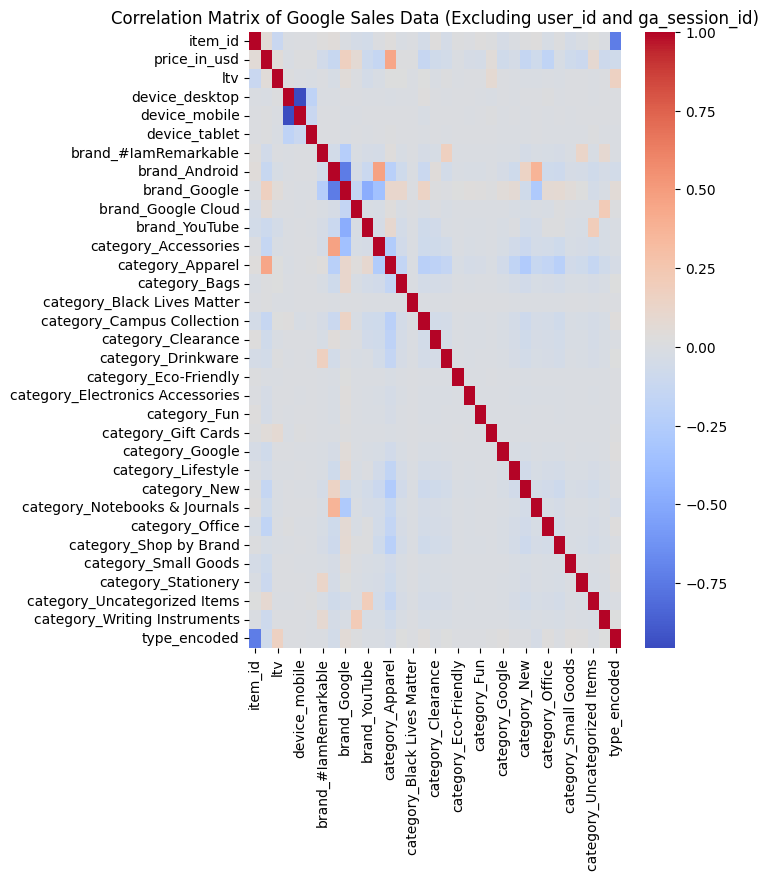

In [206]:

# Label encoding for 'type'
for col in googlesales_corr.columns:
  if googlesales_corr[col].dtype == 'bool':
    googlesales_corr[col] = googlesales_corr[col].astype(int)

le = LabelEncoder()
googlesales_corr['type_encoded'] = le.fit_transform(googlesales_corr['type'])

# Selecting numerical features for correlation, excluding user_id and ga_session_id
numerical_features = googlesales_corr.select_dtypes(include=['number'])
numerical_features = numerical_features.drop(columns=['user_id', 'ga_session_id','id_x','id_y'], errors='ignore')

# Calculating correlation matrix
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(6, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")  # Set annot=False to hide values
plt.title('Correlation Matrix of Google Sales Data (Excluding user_id and ga_session_id)')
plt.show()

**Strong Positive Correlations**:
brand_Google has a strong correlation with Apparel, New, and possibly other categories.

price_in_usd and ltv (Lifetime Value) have a moderate positive correlation. This implies that higher-priced products tend to be purchased by customers with higher lifetime value.

**Device-Specific Insight**s:
device_mobile and device_desktop show contrasting patterns with other variables, indicating that customer behavior might differ based on the device used for purchases.


In [207]:
googlesales_corr.head()

,user_id,ga_session_id,country,type,item_id,date_x,id_x,name,price_in_usd,id_y,...,category_Lifestyle,category_New,category_Notebooks & Journals,category_Office,category_Shop by Brand,category_Small Goods,category_Stationery,category_Uncategorized Items,category_Writing Instruments,type_encoded
0,5115,17001,US,purchase,0,2020-11-02 12:05:14,0,Google Land & Sea Cotton Cap,14,5115,...,0,0,0,0,0,0,0,0,0,2
1,10904,16401,TR,purchase,0,2020-11-03 08:19:14,0,Google Land & Sea Cotton Cap,14,10904,...,0,0,0,0,0,0,0,0,0,2
2,29457,17113,KR,purchase,0,2020-11-05 18:02:19,0,Google Land & Sea Cotton Cap,14,29457,...,0,0,0,0,0,0,0,0,0,2
3,30148,16175,MT,purchase,0,2020-11-05 18:33:59,0,Google Land & Sea Cotton Cap,14,30148,...,0,0,0,0,0,0,0,0,0,2
4,32087,15869,US,purchase,0,2020-11-06 03:39:46,0,Google Land & Sea Cotton Cap,14,32087,...,0,0,0,0,0,0,0,0,0,2


In [208]:
print(googlesales['type'].nunique())

3


In [209]:
googlesales['type'].unique()

array(['purchase', 'add_to_cart', 'begin_checkout'], dtype=object)

## **DATA ANALYSIS AND VISUALIZATION**

What are the primary user interaction patterns on the Google Merchandise Store website?

Total number of customers per country

In [210]:
total_unique_customers = googlesales.groupby(['country'])[['user_id']].nunique()
unics = total_unique_customers.sort_values(by='user_id', ascending=False)
unics.head(10)



,user_id
country,
US,6536
IN,1361
CA,1162
GB,467
FR,285
ES,264
CN,251
TW,243
DE,232


How effective is the platform in converting user interactions into purchases?

Total number of purchases

In [211]:
# Filter for purchase events
purchase_data = googlesales[googlesales['type'] == 'purchase']

# Calculate total purchases
total_purchases = len(purchase_data)

# Print the result
print(f"Total Purchases: {total_purchases}")

Total Purchases: 14711


In [212]:
total_interactions = len(googlesales)
print(f"Total Interactions (All Types): {total_interactions}")

Total Interactions (All Types): 719386


Conversion

In [213]:
# Calculate conversion rate
conversion_rate = total_purchases / total_interactions

# Print the result
print(f"Conversion Rate (Purchases/Interactions): {conversion_rate:.2%}")

Conversion Rate (Purchases/Interactions): 2.04%


Our analysis reveals a conversion rate of 2.04%, indicating that for every 100 interactions on the site, approximately 2 result in a purchase. This metric highlights the importance of optimizing the user journey to guide more visitors toward completing a purchase. While this conversion rate falls within a typical range for e-commerce websites, there's an opportunity to enhance customer engagement and drive higher conversions through targeted strategies like personalized recommendations, streamlined checkout processes, and compelling calls to action.

Top markets with most customers

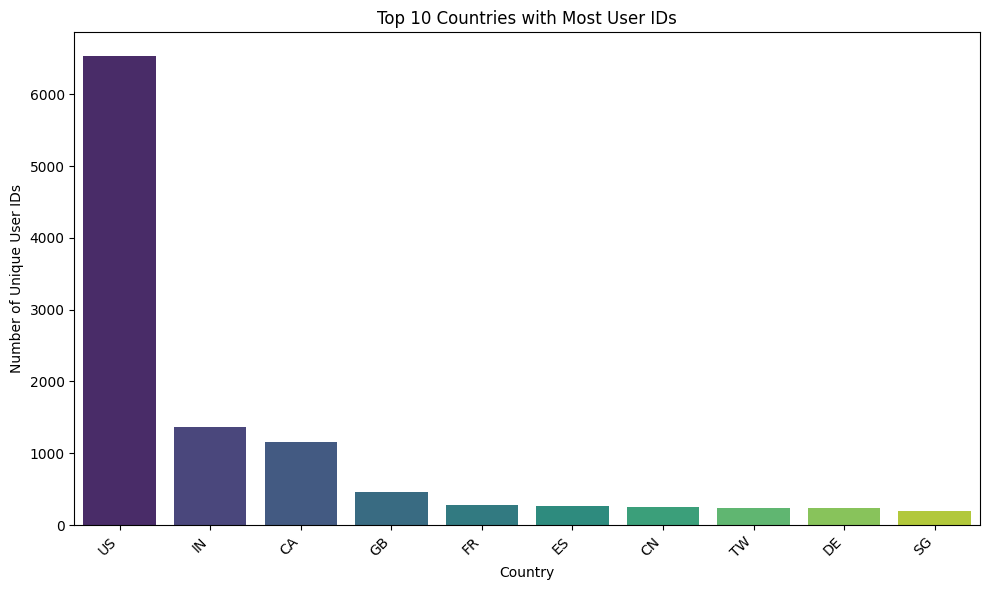

In [214]:
# Calculate the number of unique user IDs per country
country_user_counts = googlesales.groupby('country')['user_id'].nunique().sort_values(ascending=False)

# Get the top 10 countries
top_10_countries = country_user_counts.head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, hue=top_10_countries.index, palette='viridis', dodge=False, legend=False)

plt.title('Top 10 Countries with Most User IDs')
plt.xlabel('Country')
plt.ylabel('Number of Unique User IDs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Bar plot of type

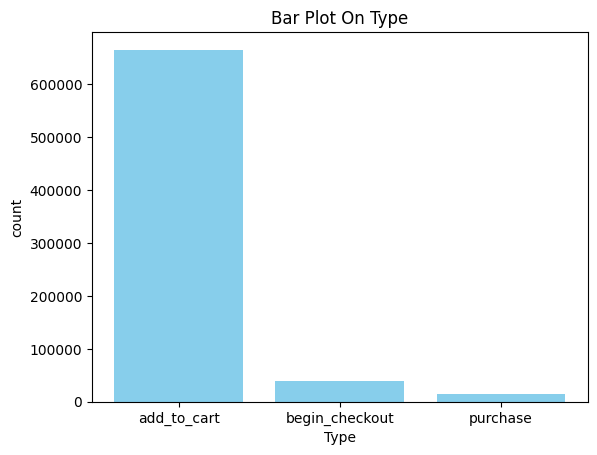

In [215]:
# Create the bar plot
plt.bar(googlesales['type'].value_counts().index, googlesales['type'].value_counts().values, color='skyblue')

# Add titles and labels
plt.title('Bar Plot On Type')
plt.xlabel('Type')
plt.ylabel('count')

# Show the plot
plt.show()

This bar plot visually depicts the distribution of user interactions across various event types. We observe a clear dominance of 'view' events, indicating that a significant portion of user activity involves browsing products. 'Add to cart' events follow, signifying a considerable level of purchase intent. However, 'purchase' events, representing successful transactions, constitute a smaller proportion. This visualization underscores the crucial need to optimize the user journey from initial product viewing to final purchase, potentially through strategies such as enhancing product

What devices do customers primarily use to access the Google Merchandise Store?

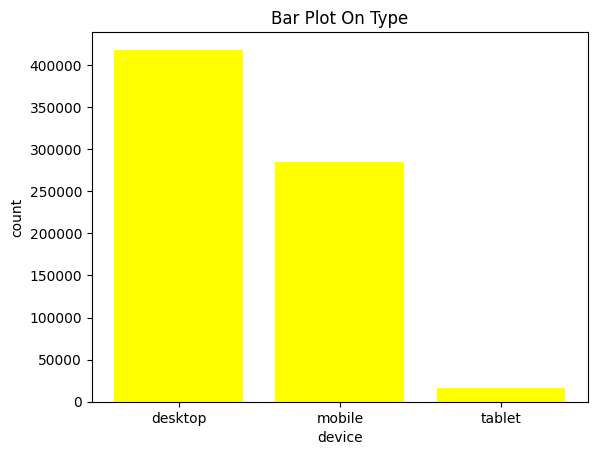

In [216]:
# Create the bar plot
plt.bar(googlesales['device'].value_counts().index, googlesales['device'].value_counts().values, color='yellow')

# Add titles and labels
plt.title('Bar Plot On Type')
plt.xlabel('device')
plt.ylabel('count')

# Show the plot
plt.show()

This bar plot illustrates the distribution of user interactions based on the device used. We observe a clear dominance of mobile devices, indicating that a significant portion of users engage with the platform through their smartphones. Desktop interactions follow, representing a substantial user base accessing the site through traditional computers. Tablet usage, while present, constitutes a smaller proportion compared to mobile and desktop. These insights highlight the importance of prioritizing mobile optimization to ensure a seamless and engaging user experience for the majority of customers. Additionally, maintaining a responsive and user-friendly design across all devices is crucial to cater to the diverse preferences of the user base

Total number of Buyers

In [217]:
buyers_data = googlesales[googlesales['type'] == 'purchase']
total_unique_buyers = purchase_data['user_id'].nunique()
print(f"Total number of unique buyers: {total_unique_buyers}")


Total number of unique buyers: 4066


To identify the total number of unique buyers, we first isolate purchase events from the overall dataset. This filtered data, representing successful transactions, is then used to calculate the distinct number of user IDs associated with these purchases. The result reveals the total number of unique buyers who have made at least one purchase

Total number of customers involved

In [218]:
total_unique_ids = googlesales['user_id'].nunique()
print(f"Total Number of Unique User IDs: {total_unique_ids}")

Total Number of Unique User IDs: 14701


To determine the total reach of the platform, we identify the distinct number of user IDs present in the dataset. This calculation provides the total number of unique individuals who have interacted with the platform, regardless of the type of interaction.

In [219]:
conversion_ratio=(total_unique_buyers/total_unique_ids)*100
print(f"Conversion Ratio: {conversion_ratio:.2f}%")

Conversion Ratio: 27.66%


Conversion ratio is very high 27.66 percent of customers are involved in buying products

Purchases using devices

In [220]:

purchases_by_device = purchase_data.groupby('device')['user_id'].count()
print(purchases_by_device)

device
desktop    8529
mobile     5910
tablet      272
Name: user_id, dtype: int64


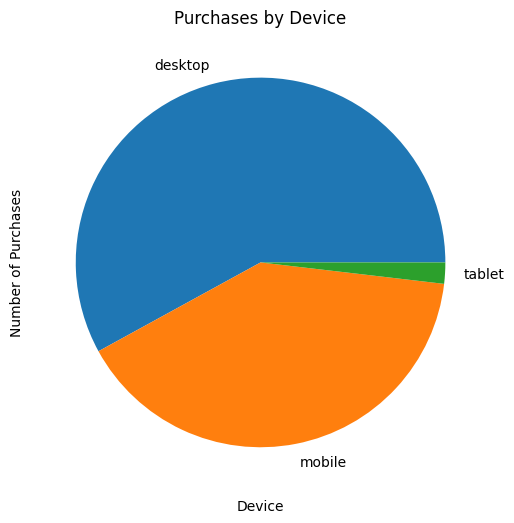

In [221]:
purchases_by_device.plot(kind='pie', figsize=(18,6),color='green')
plt.title('Purchases by Device')
plt.xlabel('Device')
plt.ylabel('Number of Purchases')
plt.show()


Most number of purchases are done using desktop than with mobile.This shows customers have more tendency to buy using desktops and ad campaings in desktop would bring higher conversions
while customers have less tendency to buy products using tablet and would give low conversions

Purchases by category

In [222]:
# Group by category and count purchases
purchases_by_category = purchase_data.groupby('category')['user_id'].count().sort_values(ascending=False)
print(purchases_by_category)

category
Apparel                    4858
Campus Collection          1456
New                        1397
Accessories                1173
Shop by Brand               818
Office                      798
Drinkware                   680
Bags                        671
Clearance                   633
Lifestyle                   583
Uncategorized Items         477
Small Goods                 293
Stationery                  292
Writing Instruments         220
Google                      214
Electronics Accessories      48
Notebooks & Journals         36
Fun                          36
Eco-Friendly                 13
Gift Cards                   13
Black Lives Matter            2
Name: user_id, dtype: int64


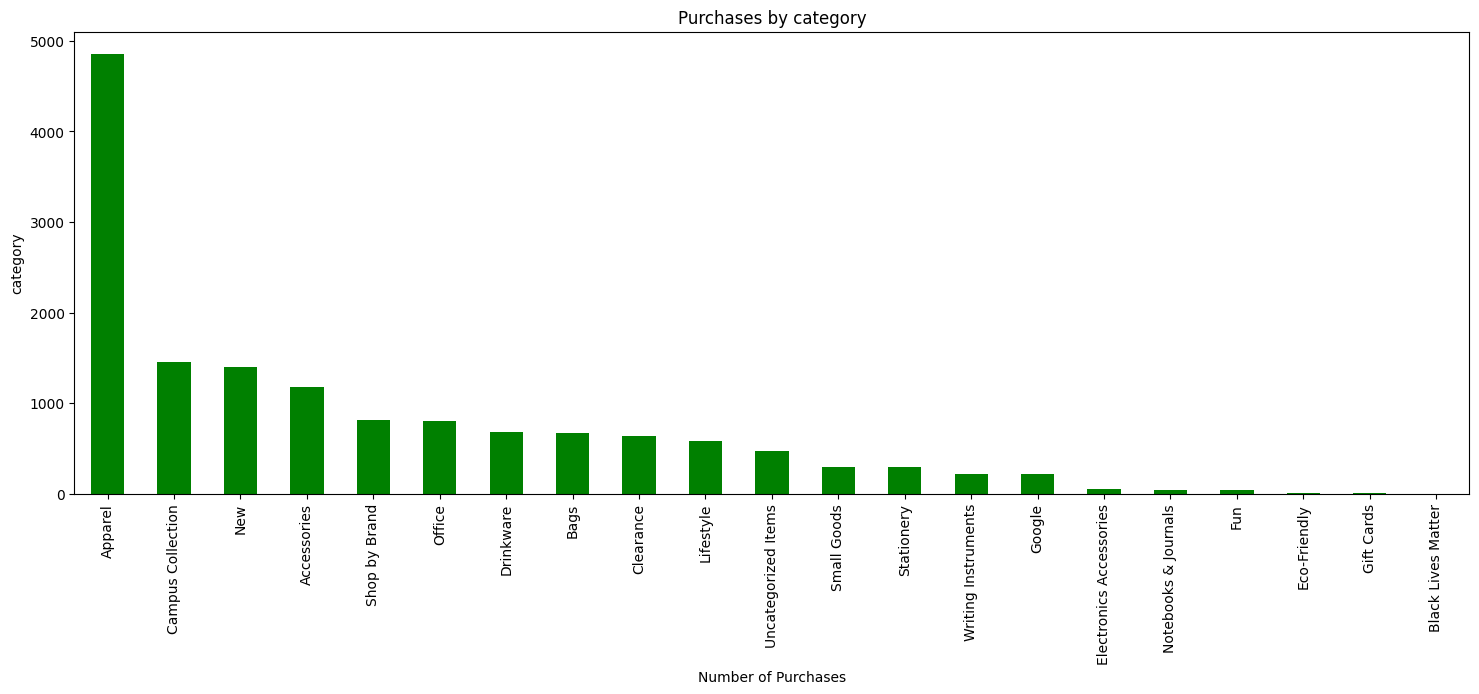

In [223]:
purchases_by_category.plot(kind='bar', figsize=(18,6),color='green')
plt.title('Purchases by category')
plt.xlabel('Number of Purchases')
plt.ylabel('category')
plt.show()

Its better to invest more in these categories like  as

*   APPARELS
*   Campus collection
*   New
*   Accessories
*   Shop by brand
they have the high sales which gives more return to the investment

Which product categories have the highest customer retention rates?

Categories with most faithful customers or returning customers

In [224]:

# Filter for purchase events
purchase_data = googlesales[googlesales['type'] == 'purchase']

# Group by user ID and category, then count purchases
category_counts = purchase_data.groupby(['user_id', 'category'])['type'].count().reset_index()

# Filter for categories purchased more than once by the same user
frequent_categories = category_counts[category_counts['type'] > 1]

# Group by category and count unique returning customers
returning_customers_by_category = frequent_categories.groupby('category')['user_id'].nunique().sort_values(ascending=False)

# Print the categories from highest to lowest
print("Categories with Returning Customers (Highest to Lowest):")
print(returning_customers_by_category)

Categories with Returning Customers (Highest to Lowest):
category
Apparel                    1180
Campus Collection           308
New                         283
Accessories                 247
Office                      157
Bags                        104
Shop by Brand               104
Clearance                   100
Uncategorized Items          88
Drinkware                    83
Lifestyle                    76
Writing Instruments          56
Stationery                   50
Small Goods                  28
Google                       22
Notebooks & Journals          6
Gift Cards                    2
Electronics Accessories       2
Name: user_id, dtype: int64


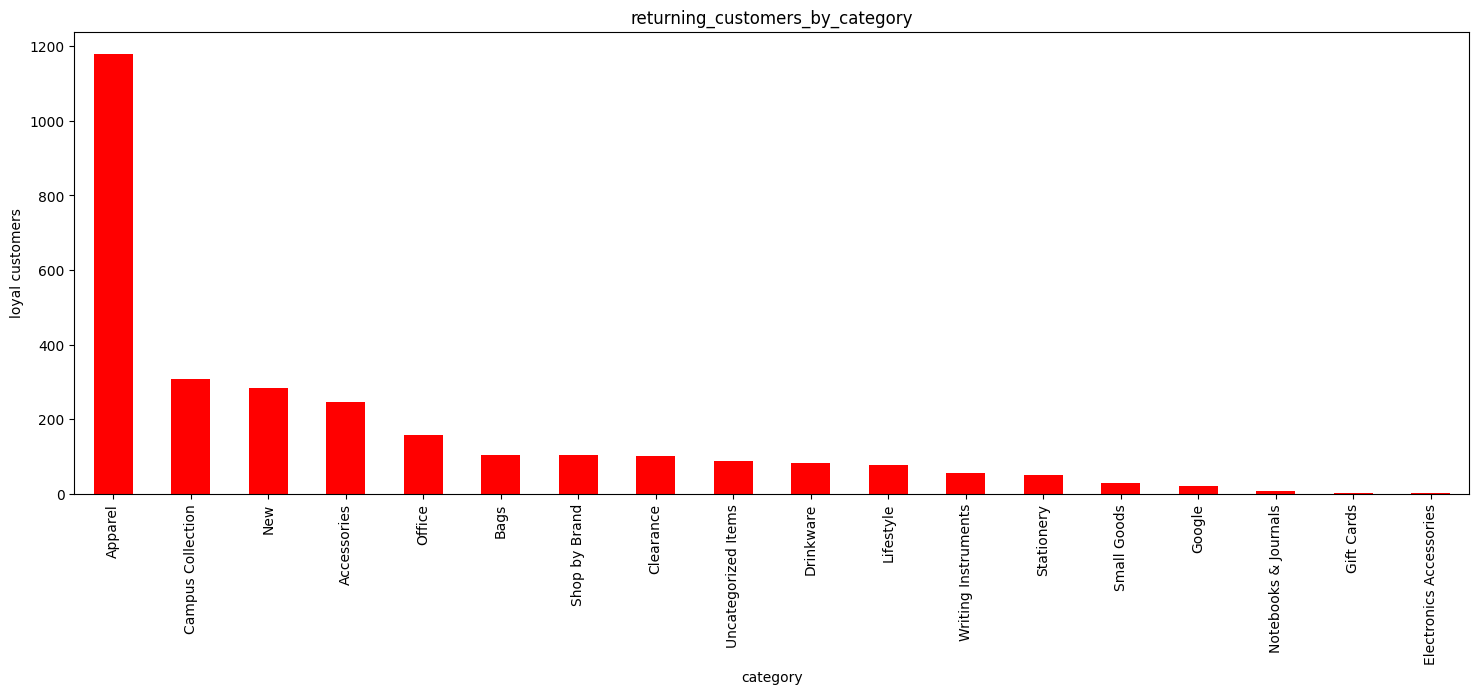

In [225]:
returning_customers_by_category.plot(kind='bar', figsize=(18,6),color='red')
plt.title('returning_customers_by_category')
plt.xlabel('category')
plt.ylabel('loyal customers')
plt.show()

customer loyalty and identify categories with high repeat purchase rates, we analyze purchase data to identify returning customers. By grouping purchases by user ID and category, we can pinpoint users who have made multiple purchases within the same category. We then aggregate this information to determine the number of unique returning customers for each category. Sorting these categories in descending order reveals the categories with the highest customer retention, providing valuable insights for targeted marketing and inventory management

What product combinations are frequently purchased together?

Bundles

In [226]:
user_category_mapping = purchase_data.groupby('user_id')['category'].unique().apply(list).to_dict()

In [227]:
from collections import Counter

# Get all category combinations from user purchases
category_combinations = [tuple(sorted(categories)) for categories in user_category_mapping.values() if len(categories) > 1]

# Count the frequency of each category combination
bundle_counts = Counter(category_combinations)
print(category_combinations)
print(bundle_counts)


[('Apparel', 'Campus Collection', 'Stationery'), ('Accessories', 'Clearance', 'Google', 'New', 'Office'), ('Bags', 'Campus Collection'), ('Apparel', 'Drinkware', 'New'), ('Apparel', 'Drinkware', 'Lifestyle', 'New'), ('Apparel', 'Uncategorized Items'), ('Apparel', 'Lifestyle', 'Shop by Brand'), ('Apparel', 'Clearance', 'New'), ('Accessories', 'Apparel', 'Campus Collection'), ('Apparel', 'New', 'Shop by Brand'), ('Accessories', 'Clearance', 'Drinkware'), ('Apparel', 'New', 'Office'), ('Apparel', 'Campus Collection'), ('Lifestyle', 'Notebooks & Journals'), ('Accessories', 'Apparel', 'Bags', 'Drinkware'), ('Apparel', 'Lifestyle'), ('Clearance', 'New'), ('Apparel', 'Bags'), ('Apparel', 'Bags', 'Google', 'Office'), ('Accessories', 'Apparel', 'Campus Collection', 'Small Goods'), ('Apparel', 'Electronics Accessories'), ('Apparel', 'Clearance'), ('Accessories', 'Apparel', 'Campus Collection', 'Drinkware', 'Google', 'New', 'Shop by Brand', 'Small Goods'), ('Campus Collection', 'Shop by Brand'), 

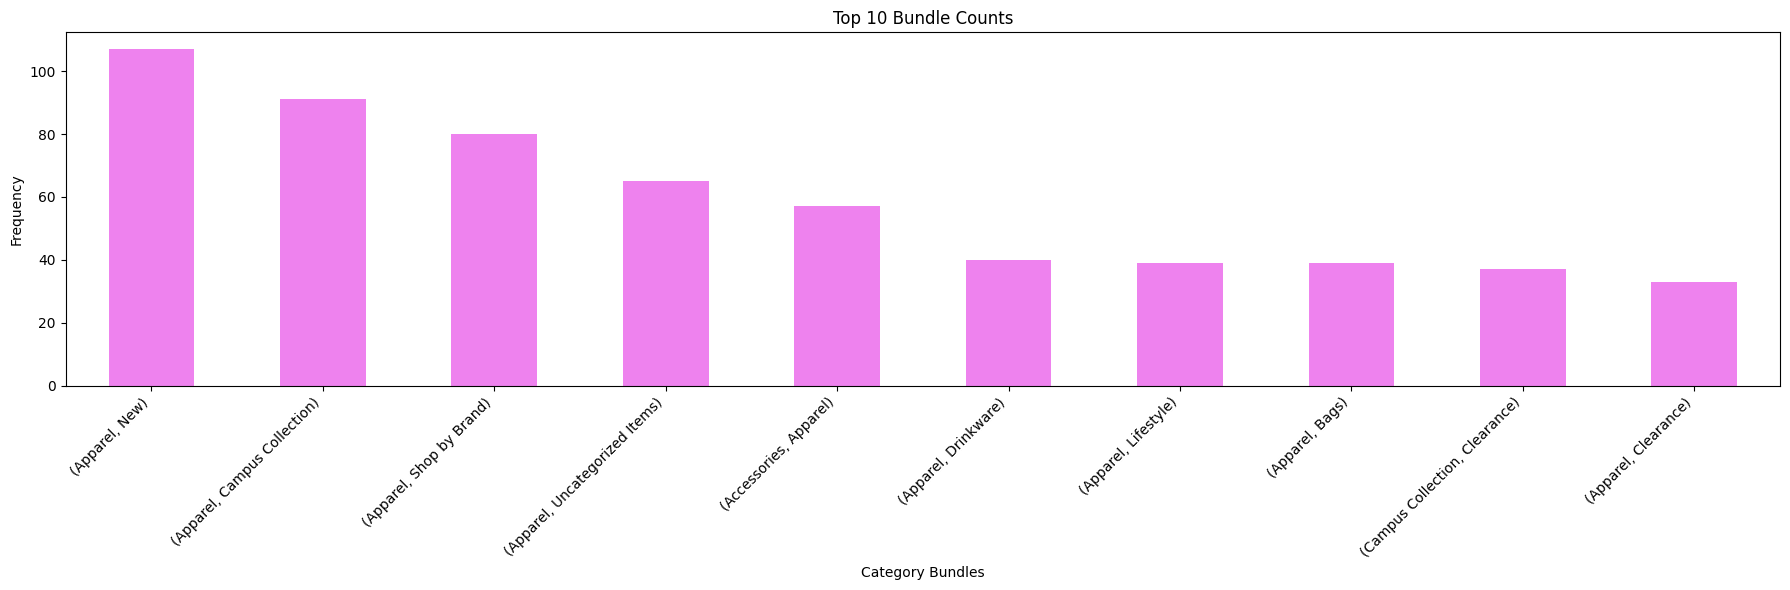

In [228]:


# Convert bundle_counts to a Pandas Series for plotting
bundle_counts_series = pd.Series(bundle_counts)

# Get the top 10 bundles
top_10_bundles = bundle_counts_series.sort_values(ascending=False).head(10)

# Now plot the top 10
top_10_bundles.plot(kind='bar', figsize=(18, 6), color='violet')
plt.title('Top 10 Bundle Counts')
plt.xlabel('Category Bundles')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

LTV customers buying patterns

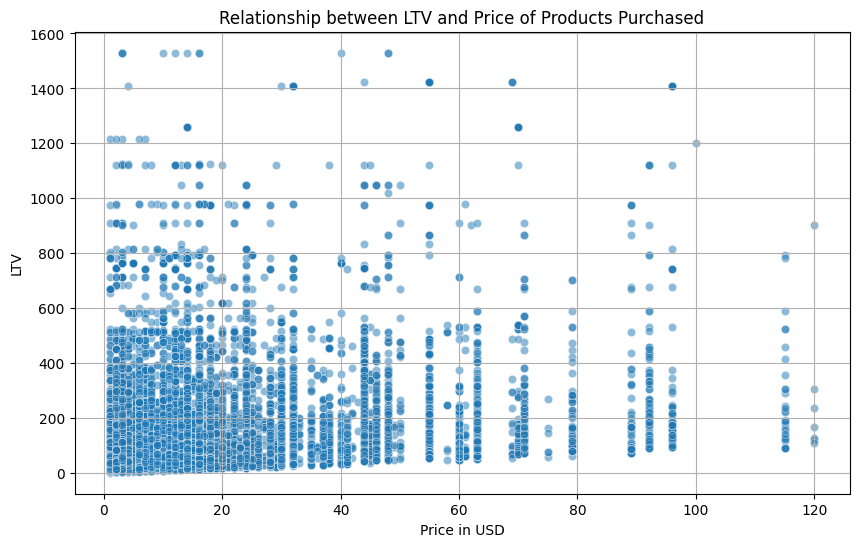

In [229]:
# Filter for purchase events
purchase_data = googlesales[googlesales['type'] == 'purchase']

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='price_in_usd', y='ltv', data=purchase_data, alpha=0.5)  # alpha for transparency
plt.title('Relationship between LTV and Price of Products Purchased')
plt.xlabel('Price in USD')
plt.ylabel('LTV')
plt.grid(True)
plt.show()

the relationship between customer lifetime value (LTV) and the price of products purchased, we generate a scatter plot. This visualization allows us to explore potential correlations between these two variables. By plotting the price of each purchased product against the LTV of the corresponding customer, we can visually assess if there's a tendency for higher-value customers to purchase more expensive products

Which product categories are associated with higher customer lifetime value (LTV)?

<ipython-input-230-292a32f4ed73>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ltv.index, y=category_ltv.values, palette="viridis")


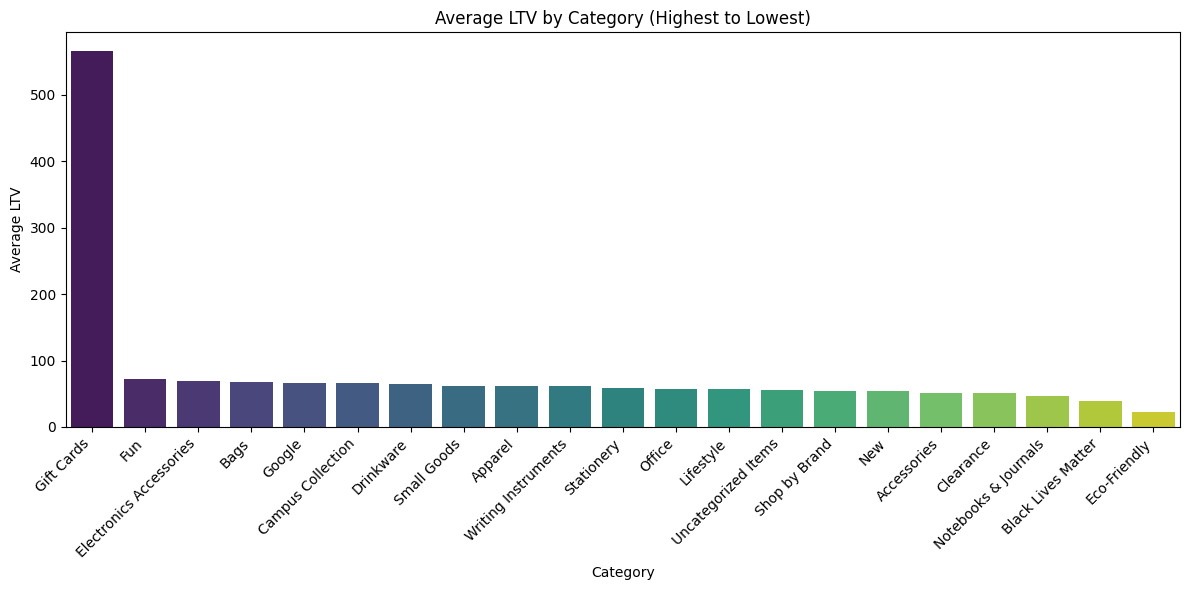

In [230]:

# Calculate average LTV per category
category_ltv = googlesales.groupby('category')['ltv'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=category_ltv.index, y=category_ltv.values, palette="viridis")
plt.title('Average LTV by Category (Highest to Lowest)')
plt.xlabel('Category')
plt.ylabel('Average LTV')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

high-value customer segments, we analyze the average lifetime value (LTV) across different product categories. By grouping customers based on their purchase categories and calculating the average LTV for each group, we can identify which categories attract and retain customers with the highest long-term value. This bar plot visually represents these findings, with categories ranked in descending order of average LTV. This visualization provides valuable insights for prioritizing marketing efforts, optimizing product offerings, and tailoring customer experiences to maximize overall customer lifetime value

Categories with highest user interaction

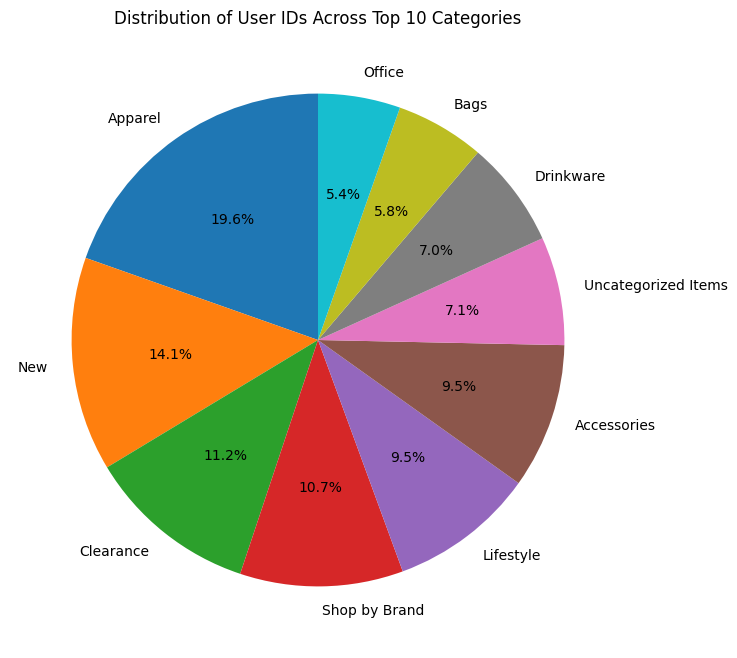

In [231]:

# Group by category and count unique user IDs
category_user_counts = googlesales.groupby('category')['user_id'].nunique().sort_values(ascending=False)

# Get the top 10 categories
top_10_categories = category_user_counts.head(10)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_categories, labels=top_10_categories.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of User IDs Across Top 10 Categories')
plt.show()

Which countries represent the largest markets for Google Merchandise Store?

<ipython-input-232-14c0f517506a>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_by_country = category_counts.groupby('country', group_keys=False).apply(lambda x: x.nlargest(10, 'user_id')).reset_index(drop=True)


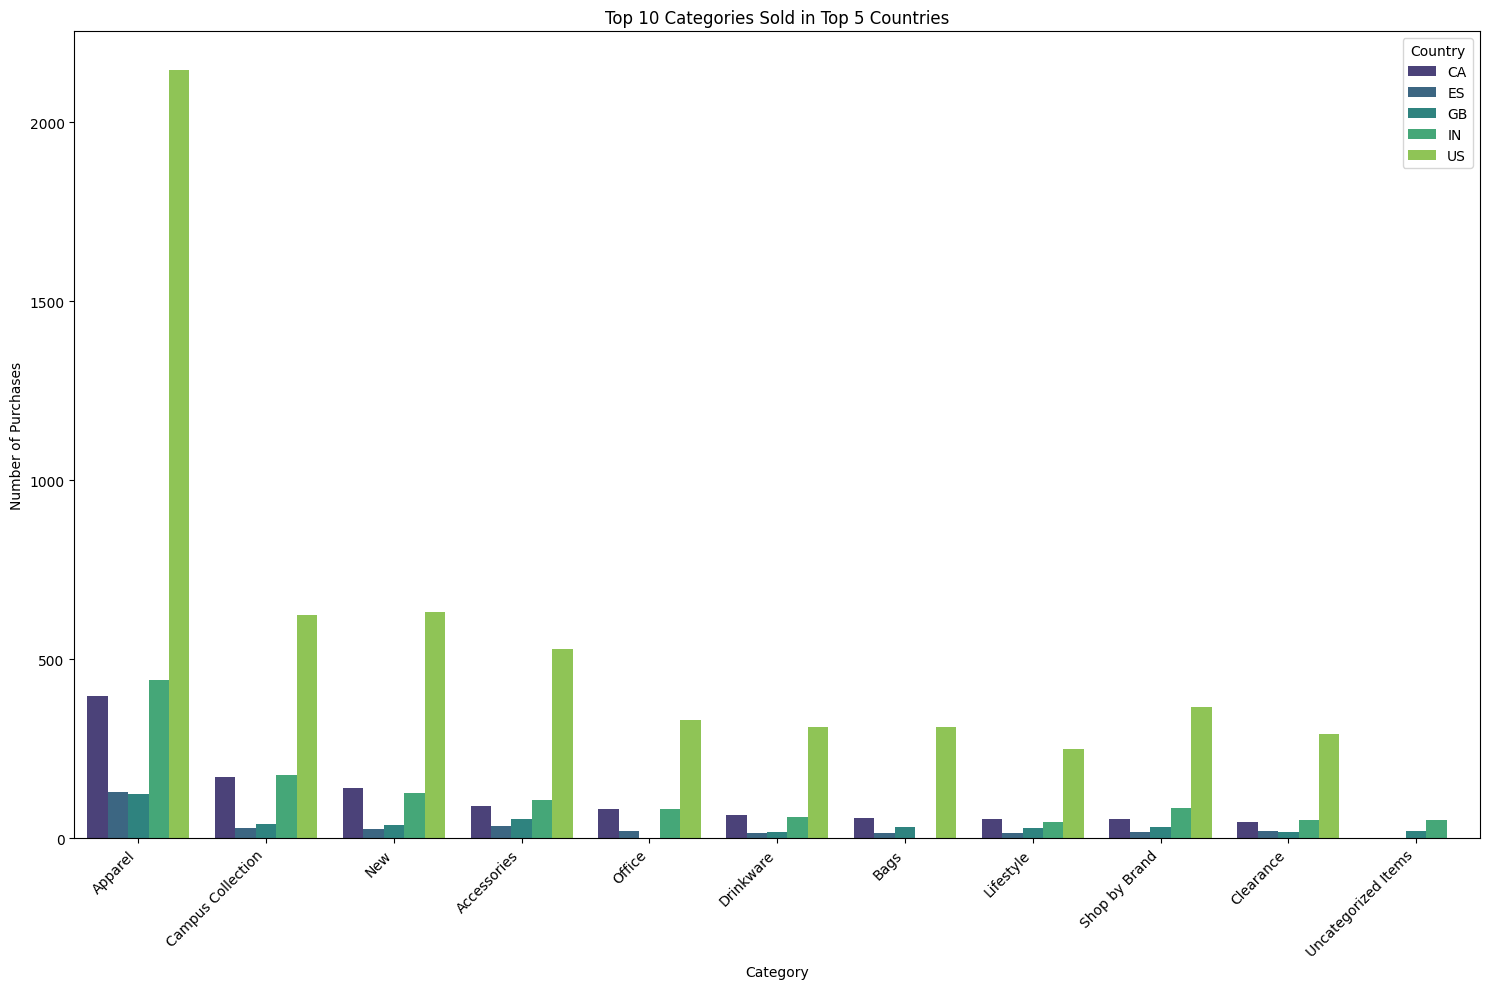

In [232]:
# Get top 5 countries
top_5_countries = googlesales['country'].value_counts().head(5).index.tolist()

# Filter data for top 5 countries and purchase events
filtered_data = googlesales[(googlesales['country'].isin(top_5_countries)) & (googlesales['type'] == 'purchase')]

# Group by country and category, then count occurrences
category_counts = filtered_data.groupby(['country', 'category'])['user_id'].count().reset_index()

# Get top 10 categories for each country
# Removing 'include_groups=False' as it's causing the error
top_categories_by_country = category_counts.groupby('country', group_keys=False).apply(lambda x: x.nlargest(10, 'user_id')).reset_index(drop=True)

# Create the plot
plt.figure(figsize=(15, 10))
sns.barplot(x='category', y='user_id', hue='country', data=top_categories_by_country, palette='viridis')
plt.title('Top 10 Categories Sold in Top 5 Countries')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

Clearly US is the biggest market in all categories.Apparels are the most sold
and analysis showed that customers are mostly interested in the apparels than rest of all the categories
to maximize sales company should also use terms like clearance sales
branded products are sold most if accompanied with various clearance sales and festive offers companies can do very well in the sales of the products
india is the second biggest market for the apparels and almost close to canada
In uncategorized category purchases are more in britan and india
campus collection,new and accessories category shows same kind of pattern in all top markets
In office category sales are least in countries like britan

In [233]:
googlesales.head()

,user_id,ga_session_id,country,device,type,item_id,date_x,id_x,name,brand,category,price_in_usd,id_y,ltv,date_y
0,5115,17001,US,mobile,purchase,0,2020-11-02 12:05:14,0,Google Land & Sea Cotton Cap,Google,Apparel,14,5115,85,2020-11-02 11:53:43
1,10904,16401,TR,desktop,purchase,0,2020-11-03 08:19:14,0,Google Land & Sea Cotton Cap,Google,Apparel,14,10904,40,2020-09-06 09:19:37
2,29457,17113,KR,mobile,purchase,0,2020-11-05 18:02:19,0,Google Land & Sea Cotton Cap,Google,Apparel,14,29457,33,2020-11-05 17:51:34
3,30148,16175,MT,desktop,purchase,0,2020-11-05 18:33:59,0,Google Land & Sea Cotton Cap,Google,Apparel,14,30148,517,2020-09-27 21:00:27
4,32087,15869,US,desktop,purchase,0,2020-11-06 03:39:46,0,Google Land & Sea Cotton Cap,Google,Apparel,14,32087,55,2020-11-06 03:15:36


What is the optimal time to display advertisements to maximize customer engagement?

In [234]:
googlesales['date_x'] = pd.to_datetime(googlesales['date_x'])

In [235]:
googlesales['year_month'] = googlesales['date_x'].dt.to_period('M')

In [236]:
sales_trends = googlesales.groupby('year_month')['price_in_usd'].sum().reset_index()

In [237]:
sales_trends['year_month'] = sales_trends['year_month'].dt.strftime('%Y-%m')

# Print sales trends
print("Sales Trends Over Time:")
print(sales_trends)

Sales Trends Over Time:
  year_month  price_in_usd
0    2020-11       2334906
1    2020-12      10999029
2    2021-01       4681921


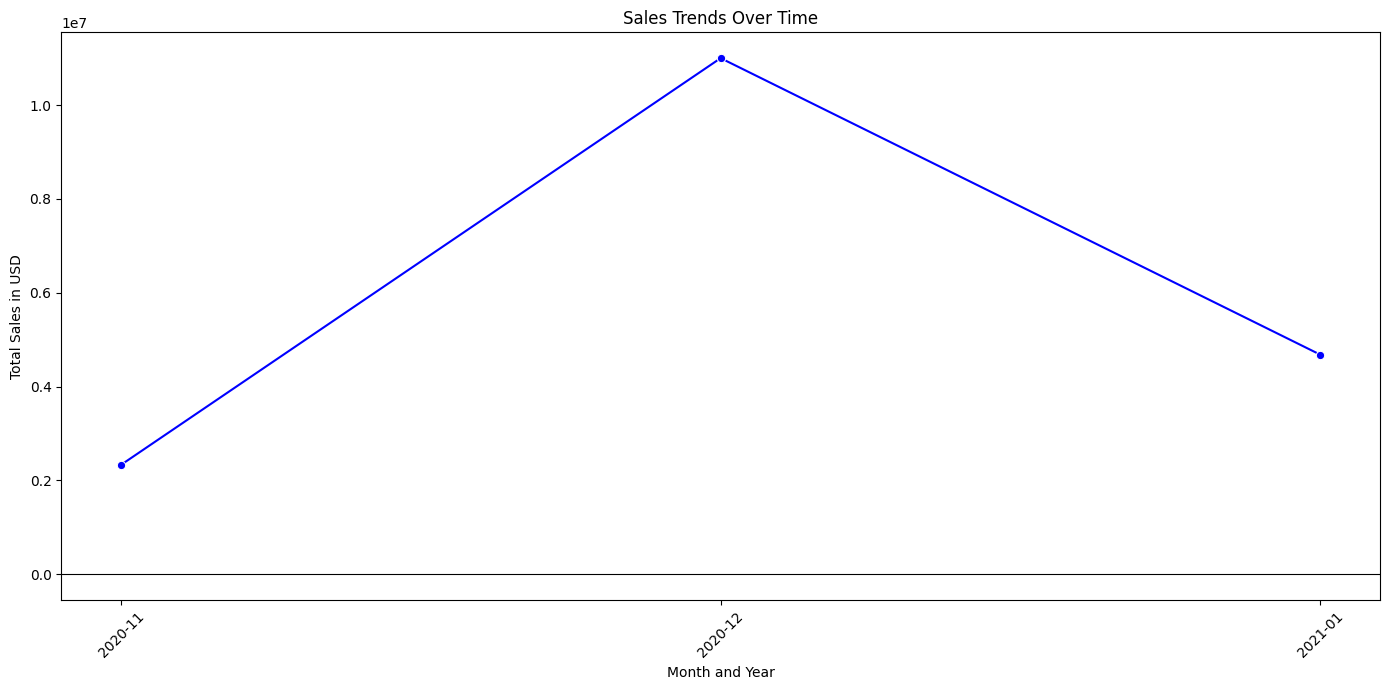

In [238]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_trends, x='year_month', y='price_in_usd', marker='o', color='blue')
plt.title('Sales Trends Over Time')
plt.ylabel('Total Sales in USD')
plt.xlabel('Month and Year')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.axhline(0, color='black', linewidth=0.8)  # Optional: add a horizontal line at y=0
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

The graph shows the best time for advertisement is on month of december as the people have tendency to purchase alot of products by this time which aligns with festive season

Key Insights:

Customer Behavior: User behavior is primarily driven by product browsing ('view' events), with a substantial portion showing purchase intent ('add to cart' events). However, the actual conversion rate to purchases is relatively low (2.04%), highlighting the need for optimization in the user journey.

Device Preference: Mobile devices are the dominant platform for user interactions, emphasizing the importance of mobile optimization for a seamless customer experience.

Customer Lifetime Value (LTV): There is a positive correlation between LTV and the price of products purchased, suggesting that higher-value customers tend to buy more expensive items. Certain product categories exhibit higher average LTV, indicating their potential for attracting and retaining valuable customers.

Returning Customers: Some categories have a higher proportion of returning customers, demonstrating customer loyalty and potential for repeat purchases. These categories should be prioritized for targeted marketing and inventory management.

Limitations
This analysis provides valuable insights into Google Merchandise Store performance, but acknowledges limitations:

Data Quality: The 'variant' column, with product variation details, had significant missing values and was excluded. This limits understanding of product variations' impact on customer behavior. Also, many records lacked 'country' information, potentially hindering analysis of geographical factors.
Data Scope: Insights and recommendations are based on a specific dataset and timeframe, and may not be generalizable to other periods or datasets.
External Factors: This analysis focused on internal data. External factors like economic conditions, competitor activities, and marketing campaigns, which could influence sales and user behavior, weren't explicitly considered.
Assumptions: Missing values were handled using specific methods (e.g., dropping the 'variant' column, filling 'country' with 'unknown'). These choices have potential limitations.
Future Research: To enhance analysis, collecting more detailed customer demographics, product usage, and marketing campaign performance would be beneficial. This would provide a deeper understanding of customer segments and preferences.

Final Explanation:

"Our comprehensive analysis of Google Merchandise Store data reveals key insights into customer behavior, device preferences, customer lifetime value, and purchase patterns. We found that while user engagement is high, the conversion rate to purchases requires optimization. Mobile devices dominate user interactions, highlighting the need for a mobile-first approach. Furthermore, higher-value customers tend to purchase more expensive products, and certain categories exhibit higher average LTV, offering opportunities for targeted marketing and product development. By leveraging these insights, Google Merchandise Store can enhance the customer journey, optimize product offerings, and drive higher customer lifetime value, ultimately leading to increased revenue and customer satisfaction."